# Naive Bayes in Python

In [167]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

## Import Data

In [168]:
csv_df = pd.read_csv('C:/ME Lethal Prediction/ME_FNL1.csv')
csv_df.head()

,Decade,Year,Month,Week,Day,Extended,Country,Success,Multiple,Suicide,...,ArmedAssault,Infrastructure,Assassination,UnknownAttack,Explosives,UnknownWeapon,Firearms,Incendiary,Melee,OtherWeapon
0,1970,1970,3,2,14,0,Egypt,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1970,1970,3,4,29,0,Lebanon,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1970,1970,4,3,15,0,OtherCountry,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1970,1970,4,4,25,0,Turkey,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1970,1970,6,1,7,1,OtherCountry,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Exploratory Data Analysis

Now, I will explore the data to gain insights about the data.

In [169]:
# view dimensions of dataset

csv_df.shape

(35766, 83)

### View top 5 rows of dataset

In [170]:
# preview the dataset

csv_df.head()

,Decade,Year,Month,Week,Day,Extended,Country,Success,Multiple,Suicide,...,ArmedAssault,Infrastructure,Assassination,UnknownAttack,Explosives,UnknownWeapon,Firearms,Incendiary,Melee,OtherWeapon
0,1970,1970,3,2,14,0,Egypt,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1970,1970,3,4,29,0,Lebanon,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1970,1970,4,3,15,0,OtherCountry,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1970,1970,4,4,25,0,Turkey,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1970,1970,6,1,7,1,OtherCountry,1,0,0,...,0,0,0,0,0,1,0,0,0,0


### View summary of dataset

In [171]:
# view summary of dataset

csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35766 entries, 0 to 35765
Data columns (total 83 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Decade                  35766 non-null  int64 
 1   Year                    35766 non-null  int64 
 2   Month                   35766 non-null  int64 
 3   Week                    35766 non-null  int64 
 4   Day                     35766 non-null  int64 
 5   Extended                35766 non-null  int64 
 6   Country                 35766 non-null  object
 7   Success                 35766 non-null  int64 
 8   Multiple                35766 non-null  int64 
 9   Suicide                 35766 non-null  int64 
 10  Attack                  35766 non-null  object
 11  Weapon                  35766 non-null  object
 12  Province                35766 non-null  object
 13  City                    35766 non-null  object
 14  Group                   35766 non-null  object
 15  Ta

We can see that there are no missing values in the dataset.

### Types of variables

In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.

First of all, I will explore categorical variables.

### Explore Categorical Variables

In [172]:
# find categorical variables

categorical = [var for var in csv_df.columns if csv_df[var].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 7 categorical variables

The categorical variables are :

 ['Country', 'Attack', 'Weapon', 'Province', 'City', 'Group', 'Target']


In [173]:
# view the categorical variables

csv_df[categorical].head()

,Country,Attack,Weapon,Province,City,Group,Target
0,Egypt,Bomb,Explosives,OtherProvince,OtherCity,Unknown,OtherTarget
1,Lebanon,Bomb,Explosives,Beirut,Beirut,Popular Front for the Liberation of Palestine ...,GovernmentDiplomatic
2,OtherCountry,Bomb,Explosives,OtherProvince,OtherCity,Popular Front for the Liberation of Palestine ...,GovernmentDiplomatic
3,Turkey,Bomb,Explosives,Istanbul,Istanbul,Palestinians,OtherTarget
4,OtherCountry,HostageKidnap,UnknownWeapon,OtherProvince,OtherCity,Popular Front for the Liberation of Palestine ...,GovernmentDiplomatic


Explore problems within categorical variables /
First, I will explore the categorical variables.

### Missing values in categorical variables

In [174]:
# check missing values in categorical variables

csv_df[categorical].isnull().sum()

Country     0
Attack      0
Weapon      0
Province    0
City        0
Group       0
Target      0
dtype: int64

We can see that there are no missing values in the categorical variables.

Frequency counts of categorical variables
Now, I will check the frequency counts of categorical variables.

In [175]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(csv_df[var].value_counts())

Iraq                        20310
Turkey                       2199
Yemen                        1769
Libya                        1749
Egypt                        1651
Syria                        1599
Algeria                      1541
West Bank and Gaza Strip     1347
Lebanon                      1275
Israel                       1263
OtherCountry                 1063
Name: Country, dtype: int64
Bomb              23889
ArmedAssault       5408
Assassination      2953
HostageKidnap      1757
UnknownAttack       788
Infrastructure      743
OtherAttack         228
Name: Attack, dtype: int64
Explosives       24874
Firearms          7591
UnknownWeapon     1917
Incendiary         670
Melee              595
OtherWeapon        119
Name: Weapon, dtype: int64
OtherProvince    11646
Baghdad           7409
Diyala            2527
Nineveh           2515
Al Anbar          2409
Saladin           2372
Kirkuk            1260
West Bank          942
Babil              908
North Sinai        773
Istanbul

### View frequency distribution of categorical variables

In [176]:
for var in categorical: 
    
    print(csv_df[var].value_counts()/np.float(len(csv_df)))

Iraq                        0.567858
Turkey                      0.061483
Yemen                       0.049460
Libya                       0.048901
Egypt                       0.046161
Syria                       0.044707
Algeria                     0.043086
West Bank and Gaza Strip    0.037661
Lebanon                     0.035648
Israel                      0.035313
OtherCountry                0.029721
Name: Country, dtype: float64
Bomb              0.667925
ArmedAssault      0.151205
Assassination     0.082564
HostageKidnap     0.049125
UnknownAttack     0.022032
Infrastructure    0.020774
OtherAttack       0.006375
Name: Attack, dtype: float64
Explosives       0.695465
Firearms         0.212241
UnknownWeapon    0.053598
Incendiary       0.018733
Melee            0.016636
OtherWeapon      0.003327
Name: Weapon, dtype: float64
OtherProvince    0.325617
Baghdad          0.207152
Diyala           0.070654
Nineveh          0.070318
Al Anbar         0.067354
Saladin          0.066320
Kirk

C:\Users\Nicholas\AppData\Local\Temp/ipykernel_14812/3240309505.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(csv_df[var].value_counts()/np.float(len(csv_df)))


### Explore Lethal variable

In [177]:
# check labels in workclass variable

csv_df.Lethal.unique()

array([0, 1], dtype=int64)

In [178]:
# check frequency distribution of values in Lethal variable

csv_df.Lethal.value_counts()

1    20002
0    15764
Name: Lethal, dtype: int64

### Explore Target variable

In [179]:
# check labels in occupation variable

csv_df.Target.unique()

array(['OtherTarget', 'GovernmentDiplomatic', 'Business', 'Police',
       'Military', 'GovernmentGeneral', 'Private',
       'EducationalInstitution', 'JournalistsMedia', 'Utilities',
       'ReligiousInstitute', 'Terrorists', 'UnknownTarget',
       'Transportation'], dtype=object)

In [180]:
# check frequency distribution of values in Target variable

csv_df.Target.value_counts()

Private                   13058
Police                     5729
GovernmentGeneral          3800
Business                   3344
UnknownTarget              1731
Military                   1473
ReligiousInstitute         1172
Terrorists                 1165
Transportation              960
OtherTarget                 872
GovernmentDiplomatic        678
EducationalInstitution      671
JournalistsMedia            574
Utilities                   539
Name: Target, dtype: int64

### Number of labels: cardinality

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [181]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(csv_df [var].unique()), ' labels')
# Group has very high cardinality, to it needs removing from any modelling or transforming to reduce its cardinality

Country  contains  11  labels
Attack  contains  7  labels
Weapon  contains  6  labels
Province  contains  15  labels
City  contains  8  labels
Group  contains  595  labels
Target  contains  14  labels


### Explore Numerical Variables

In [182]:
# find numerical variables

numerical = [var for var in csv_df.columns if csv_df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 76 numerical variables

The numerical variables are : ['Decade', 'Year', 'Month', 'Week', 'Day', 'Extended', 'Success', 'Multiple', 'Suicide', 'Lethal', 'Decade1970', 'Decade1980', 'Decade1990', 'Decade2000', 'Decade2010', 'Egypt', 'Lebanon', 'OtherCountry', 'Turkey', 'Israel', 'Algeria', 'Syria', 'WestBankGazaStrip', 'Iraq', 'Libya', 'Yemen', 'OtherProvince', 'BeirutProvince', 'IstanbulProvince', 'AleppoProvince', 'WestBankProvince', 'BaghdadProvince', 'SouthernProvince', 'BenghaziProvince', 'NinevehProvince', 'SaladinProvince', 'AlAnbarProvince', 'DiyalaProvince', 'KirkukProvince', 'BabilProvince', 'NorthSinaiProvince', 'OtherCity', 'BeirutCity', 'IstanbulCity', 'BaghdadCity', 'KirkukCity', 'BenghaziCity', 'MosulCity', 'BaqubahCity', 'OtherTarget', 'GovernmentDiplomatic', 'Business', 'Police', 'Military', 'GovernmentGeneral', 'Private', 'EducationalInstitution', 'JournalistsMedia', 'Utilities', 'ReligiousInstitute', 'TerroristsTarget', 'UnknownTarget', 'Transportation', 'Bo

In [183]:
# view the numerical variables

csv_df[numerical].head()

,Decade,Year,Month,Week,Day,Extended,Success,Multiple,Suicide,Lethal,...,ArmedAssault,Infrastructure,Assassination,UnknownAttack,Explosives,UnknownWeapon,Firearms,Incendiary,Melee,OtherWeapon
0,1970,1970,3,2,14,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1970,1970,3,4,29,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1970,1970,4,3,15,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1970,1970,4,4,25,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1970,1970,6,1,7,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Explore problems within numerical variables

Now, I will explore the numerical variables.

### Missing values in numerical variables

In [184]:
# check missing values in numerical variables

csv_df[numerical].isnull().sum()

Decade           0
Year             0
Month            0
Week             0
Day              0
                ..
UnknownWeapon    0
Firearms         0
Incendiary       0
Melee            0
OtherWeapon      0
Length: 76, dtype: int64

We can see that all the numerical variables do not contain missing values.

### Declare feature vector and target variable 

In [185]:
# split X and Y into training and test sets
from sklearn.model_selection import train_test_split
# define x and y
feature_cols = ['OtherProvince',
       'BeirutProvince', 'IstanbulProvince', 'AleppoProvince',
       'WestBankProvince', 'BaghdadProvince', 'SouthernProvince',
       'BenghaziProvince', 'NinevehProvince', 'SaladinProvince',
       'AlAnbarProvince', 'DiyalaProvince', 'KirkukProvince', 'BabilProvince',
       'NorthSinaiProvince', 'OtherCity', 'BeirutCity', 'Bomb',
       'HostageKidnap', 'OtherAttack', 'ArmedAssault', 'Infrastructure',
       'Assassination']

# Convert values in Lethal Column:

csv_df['Lethal'] = csv_df['Lethal'].replace([0],'Not Lethal')
csv_df['Lethal'] = csv_df['Lethal'].replace([1],'Lethal')

# check labels in occupation variable

csv_df.Lethal.unique()

array(['Not Lethal', 'Lethal'], dtype=object)

In [186]:
X = csv_df[feature_cols]
Y = csv_df.Lethal

### Split X and Y into training and test sets

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y, shuffle = True, random_state = 66)

In [188]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((26824, 23), (8942, 23))

## Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will display the categorical and numerical variables again separately.

In [189]:
# check data types in X_train

X_train.dtypes

OtherProvince         int64
BeirutProvince        int64
IstanbulProvince      int64
AleppoProvince        int64
WestBankProvince      int64
BaghdadProvince       int64
SouthernProvince      int64
BenghaziProvince      int64
NinevehProvince       int64
SaladinProvince       int64
AlAnbarProvince       int64
DiyalaProvince        int64
KirkukProvince        int64
BabilProvince         int64
NorthSinaiProvince    int64
OtherCity             int64
BeirutCity            int64
Bomb                  int64
HostageKidnap         int64
OtherAttack           int64
ArmedAssault          int64
Infrastructure        int64
Assassination         int64
dtype: object

In [190]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [191]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['OtherProvince',
 'BeirutProvince',
 'IstanbulProvince',
 'AleppoProvince',
 'WestBankProvince',
 'BaghdadProvince',
 'SouthernProvince',
 'BenghaziProvince',
 'NinevehProvince',
 'SaladinProvince',
 'AlAnbarProvince',
 'DiyalaProvince',
 'KirkukProvince',
 'BabilProvince',
 'NorthSinaiProvince',
 'OtherCity',
 'BeirutCity',
 'Bomb',
 'HostageKidnap',
 'OtherAttack',
 'ArmedAssault',
 'Infrastructure',
 'Assassination']

# Model training 

In [192]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB, CategoricalNB

# instantiate the model
cnb = CategoricalNB()

# fit the model
cnb.fit(X_train, Y_train)

CategoricalNB()

# Predict the results 

In [193]:
y_pred = cnb.predict(X_test)

y_pred

array(['Lethal', 'Not Lethal', 'Lethal', ..., 'Lethal', 'Lethal',
       'Lethal'], dtype='<U10')

#  Check accuracy score

In [194]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.6579


### Compare the train-set and test-set accuracy

In [195]:
y_pred_train = cnb.predict(X_train)

y_pred_train

array(['Not Lethal', 'Not Lethal', 'Lethal', ..., 'Lethal', 'Not Lethal',
       'Not Lethal'], dtype='<U10')

In [196]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train)* 100))

Training-set accuracy score: 65.7173


### Check for overfitting and underfitting

In [197]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(cnb.score(X_train, Y_train)* 100))

print('Test set score: {:.4f}'.format(cnb.score(X_test, Y_test)* 100))

Training set score: 65.7173
Test set score: 65.7907


The training-set accuracy score is 65.7173 while the test-set accuracy to be 65.7907. These two values are quite comparable. So, there is no sign of overfitting.

## Compare model accuracy with null accuracy

So, the model accuracy is 65.7907. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [198]:
# check class distribution in test set

Y_test.value_counts()

Lethal        5001
Not Lethal    3941
Name: Lethal, dtype: int64

We can see that the occurences of most frequent class is 5001. So, we can calculate null accuracy by dividing 5001 by total number of occurences.

In [199]:
# check null accuracy score

null_accuracy = (5001 / (5001 + 3941))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy* 100))

Null accuracy score: 55.9271


We can see that our model accuracy score is 65.7907 but null accuracy score is 55.9271. So, we can conclude that our Categorical Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

# Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [200]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[3623 1378]
 [1681 2260]]

True Positives(TP) =  3623

True Negatives(TN) =  2260

False Positives(FP) =  1378

False Negatives(FN) =  1681


The confusion matrix shows 1544 + 4369 = 5913 correct predictions and 2397 + 632 = 3029 incorrect predictions.

In this case, we have

True Positives (Actual Positive: 1 and Predict Positive: 1) - 1544\
True Negatives (Actual Negative: 0 and Predict Negative: 0) - 4369\
False Positives (Actual Negative: 0 but Predict Positive: 1) - 2397 (Type I error)\
False Negatives (Actual Positive: 1 but Predict Negative: 0) - 632 (Type II error)

<AxesSubplot:>

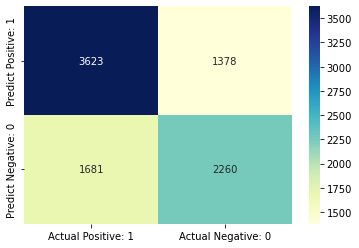

In [201]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive: 1', 'Actual Negative: 0'], 
                                 index = ['Predict Positive: 1', 'Predict Negative: 0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

# Classification metrices

### Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [202]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

      Lethal       0.68      0.72      0.70      5001
  Not Lethal       0.62      0.57      0.60      3941

    accuracy                           0.66      8942
   macro avg       0.65      0.65      0.65      8942
weighted avg       0.66      0.66      0.66      8942



### Classification accuracy

In [203]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [204]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6579


### Classification Error

In [205]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3421


### Precision

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [206]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7245


### Recall

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [207]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6831


In [208]:
### True Positive Rate

True Positive Rate is synonymous with Recall.

In [211]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.6831


### False Positive Rate

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

### Specificity

In [212]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6212


### f1-score

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

### Support

Support is the actual number of occurrences of the class in our dataset.

# Calculate class probabilities 

In [213]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = cnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.66718087, 0.33281913],
       [0.40767442, 0.59232558],
       [0.61114682, 0.38885318],
       [0.75160181, 0.24839819],
       [0.90555753, 0.09444247],
       [0.38747834, 0.61252166],
       [0.75160181, 0.24839819],
       [0.83135329, 0.16864671],
       [0.75160181, 0.24839819],
       [0.75160181, 0.24839819]])

### Observations

In each row, the numbers sum to 1.

There are 2 columns which correspond to 2 classes - Non Lethal Attack and Lethal Attack

Class 0 means that a lethal attack did not occur

Class 1 means that a lethal attack did occur

Importance of predicted probabilities

We can rank the observations by probability of whether a lethal attack happens or does not happen.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

In [214]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data = y_pred_prob, columns = ['Prob of No Lethal Attack', 'Prob of Lethal Attack'])

y_pred_prob_df

,Prob of No Lethal Attack,Prob of Lethal Attack
0,0.667181,0.332819
1,0.407674,0.592326
2,0.611147,0.388853
3,0.751602,0.248398
4,0.905558,0.094442
5,0.387478,0.612522
6,0.751602,0.248398
7,0.831353,0.168647
8,0.751602,0.248398
9,0.751602,0.248398


In [215]:
# print the first 10 predicted probabilities for class 1 - Lethal Attack

cnb.predict_proba(X_test)[0:10, 1]

array([0.33281913, 0.59232558, 0.38885318, 0.24839819, 0.09444247,
       0.61252166, 0.24839819, 0.16864671, 0.24839819, 0.24839819])

In [216]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = cnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

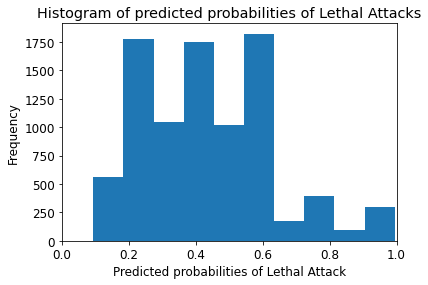

In [217]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Lethal Attacks')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of Lethal Attack')
plt.ylabel('Frequency')

The above plot reveals a highly negatively or left skewed distribution. It also indicates that most attacks have a high probability of being lethal as indicated by the right most bar

# ROC - AUC 

### Roc Curve

Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positive. It will increase both True Positives (TP) and False Positives (FP).

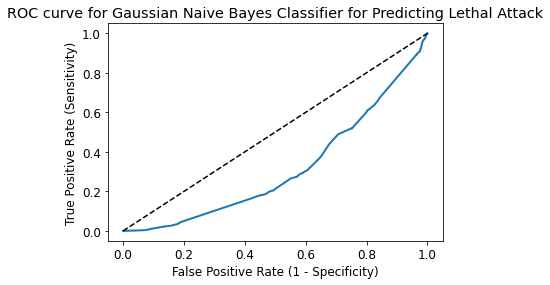

In [218]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, y_pred1, pos_label = 'Lethal')

plt.figure(figsize = (6,4))

plt.plot(fpr, tpr, linewidth = 2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Lethal Attack')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC AUC

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [219]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(Y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6852


Interpretation\

ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model is far from 1 and indeed it is below the null accuracy. So, we can conclude that our classifier does a poor job in predicting whether a lethal terrorist attack will occur or not.

In [220]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(cnb, X_train, Y_train, cv = 5, scoring = 'roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.6883


### k-Fold Cross Validation

In [221]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(cnb, X_train, Y_train, cv = 10, scoring = 'accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.67499068 0.65598211 0.66977264 0.65747298 0.65287099 0.65734526
 0.65920955 0.64578673 0.65324385 0.64131245]


We can summarize the cross-validation accuracy by calculating its mean.

In [222]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.6568


### Intrepretation

Using the mean cross-validation, we can conclude that we expect the model to be 0.6568% accurate on average.

If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 65% accuracy to 67% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

Our original model accuracy is 66%, but the mean cross-validation accuracy is 0.6568. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

# Results and conclusion

In this project, I built a Categorical Naïve Bayes Classifier model to predict whether a lethsl terrorist attack occurs.\ The model yields a good performance as indicated by the model accuracy which was found to be 65.7907.\

The training-set accuracy score is 65.7173 while the test-set accuracy to be 65.7907. These two values are quite comparable. So, there is no sign of overfitting.\

I have compared the model accuracy score which is 65.7907 with null accuracy score which is 55.9271. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.\

ROC AUC of our model approaches is far from 1. So, we can conclude that our classifier does a very poor job in predicting whether a lethal attack occurs or not.\

Using the mean cross-validation, we can conclude that we expect the model to be around 66.68% accurate on average.\

If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 65% accuracy to 67% accuracy. So, we can conclude that the model is independent of the particular folds used for training.\

Our original model accuracy is 65.7907, but the mean cross-validation accuracy is 0.6568. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.